### **Perceptron**

In [69]:
# Libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import datasets
from sklearn.model_selection import train_test_split

sns.set_style('darkgrid')
sns.set_context('paper', font_scale = 1.2)

In [70]:
# Criando o objeto principal da rede Perceptron
class Perceptron:
    
    # Iniciando a taxa de aprendizado (learning_rate) e o número de iterações (n_iters)
    def __init__(self, learning_rate= 0.01, n_iters= 100):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None
        self.errors = []

    # Definindo o método de ajuste (fit) para o treinamento do modelo
    def fit(self, X, y):
        n_samples, n_features= X.shape

        # Init parameters
        self.weights= np.zeros(n_features)
        self.bias = 0

        y_ = np.array([1 if i > 0 else 0 for i in y])

        for _ in range(self.n_iters):
            error = 0
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                # Perceptron update
                update = self.lr * (y_[idx] - y_predicted)

                self.weights += update * x_i
                self.bias += update
                error += int(update != 0)
            self.errors.append(error)

    # Definição do método de predição da classificação dos dados de entrada
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

    # (Equação de ativação: Degrau)
    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)

# Acurária do modelo
def accuracy(y_true,  y_pred):
    accuracy = np.sum( y_true == y_pred) / len(y_true)
    return accuracy

Perceptron classification accuracy: 1.0000


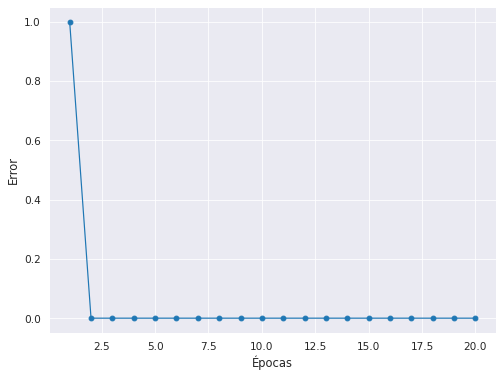

In [71]:
# Exemplo com dataset aleatório
X,y = datasets.make_blobs(n_samples = 150, n_features= 2, centers= 2, cluster_std= 1.05, random_state= 123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 123)

# Treinando o modelo
perceptron = Perceptron(learning_rate= 0.01, n_iters= 20)
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)

# Acurácia
print(f'Perceptron classification accuracy: {accuracy(y_test, y_pred):.4f}')

# Error por época
fig = plt.figure(figsize = (8, 6))
plt.plot(range(1, len(perceptron.errors) + 1), perceptron.errors, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Error')
plt.show()

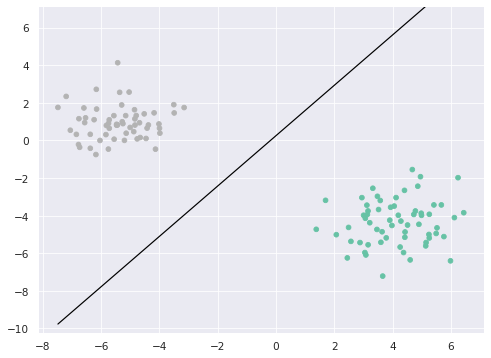

In [72]:
# Visualização da classificação
fig = plt.figure(figsize = (8,6))
ax  = fig.add_subplot(1,1,1)
plt.scatter(X_train[:, 0], X_train[:, 1], marker = 'o', c = y_train, cmap = 'Set2')

x0_1 = np.amin(X_train[:,0])
x0_2 = np.amax(X_train[:,0])

x1_1 =(-perceptron.weights[0] * x0_1 - perceptron.bias) / perceptron.weights[1]
x1_2 =(-perceptron.weights[0] * x0_2 - perceptron.bias) / perceptron.weights[1]

ax.plot([x0_1, x0_2], [x1_1, x1_2], 'k')

ymin = np.amin(X_train[:, 1])
ymax = np.amax(X_train[:, 1])
ax.set_ylim(ymin - 3, ymax + 3)

plt.show()

* **Exemplo com dataset iris**

In [73]:
# Exemplo com dataset iris
path = 'datasets/iris-modificado.csv'
iris = pd.read_csv(path)

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [74]:
# Filtering dataset
iris.dropna(inplace= True)
iris.drop([34], inplace = True)  # Duplicated row

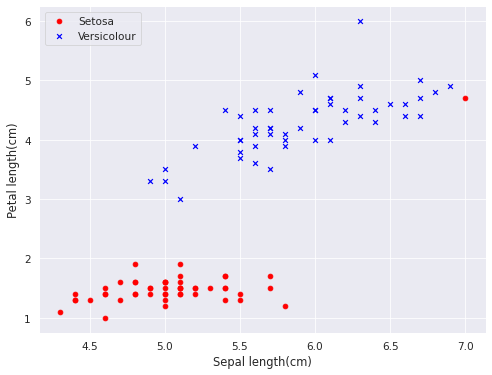

In [75]:
# Preparando os dados para classificação
y = iris.iloc[0:100,4].values
y = np.where(y == 'Iris-setosa', 1, 0) 
X = iris.iloc[0:100,[0,2]].values

# Visualização dos dados
fig = plt.figure(figsize = (8,6))

# Plotagem Iris Setosa amostras
plt.scatter(X[:50, 0], X[:50, 1], color = 'red', marker = 'o', label = 'Setosa')
# Plotagem Iris Versicolour amostras
plt.scatter(X[50:100, 0], X[50:100, 1], color = 'blue', marker = 'x', label = 'Versicolour')

# Legenda
plt.xlabel('Sepal length(cm)')
plt.ylabel('Petal length(cm)')
plt.legend(loc = 'upper left')
plt.show()

Perceptron classification accuracy: 1.0000


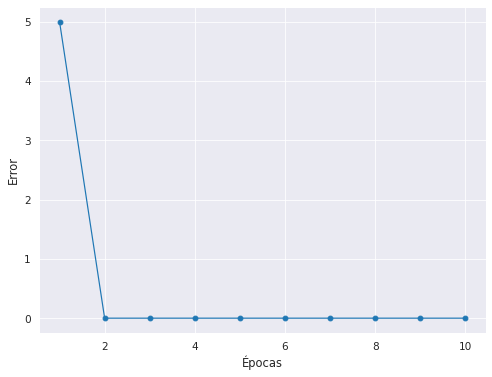

In [76]:
# Separando o dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 321)

# Treinando o modelo
perceptron = Perceptron(learning_rate= 0.01, n_iters= 10)
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)

# Acurácia
print(f'Perceptron classification accuracy: {accuracy(y_test, y_pred):.4f}')

# Error por época
fig = plt.figure(figsize = (8, 6))
plt.plot(range(1, len(perceptron.errors) + 1), perceptron.errors, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Error')
plt.show()

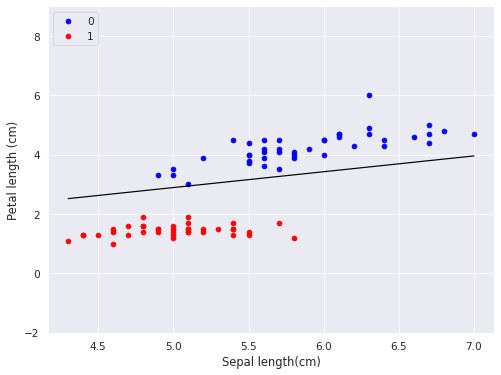

In [77]:
# Visualização da classificação
fig = plt.figure(figsize = (8,6))
ax  = fig.add_subplot(1,1,1)

colors = ('blue', 'red')
cmap = ListedColormap(colors[:len(np.unique(y_train))])
for idx, cl in enumerate(np.unique(y_train)):
    plt.scatter(X_train[y_train == cl, 0], X_train[y_train == cl, 1], color = cmap(idx), label = cl)

x0_1 = np.amin(X_train[:,0])
x0_2 = np.amax(X_train[:,0])

x1_1 =(-perceptron.weights[0] * x0_1 - perceptron.bias) / perceptron.weights[1]
x1_2 =(-perceptron.weights[0] * x0_2 - perceptron.bias) / perceptron.weights[1]

ax.plot([x0_1, x0_2], [x1_1, x1_2], 'k')

ymin = np.amin(X_train[:, 1])
ymax = np.amax(X_train[:, 1])
ax.set_ylim(ymin - 3, ymax + 3)

plt.xlabel('Sepal length(cm)')
plt.ylabel('Petal length (cm)')
plt.legend(loc = 'upper left')
plt.show()